# SUBNATIONAL ECONOMIC OUTPUT

#### The dataset reports the economic output of 1,661 regions in 83 countries from 1960 to 2020. It shows the yearly value of the total and sectoral output of each region, such as agriculture, manufacturing, and services. Unlike other projects that used interpolation to guess the data, DOSE only used data from reliable sources, such as “statistical agencies, yearbooks and academic literature.”

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv("C:\\Users\\91805\\Desktop\\DOSE_V2.csv")
df

,country,region,GID_0,GID_1,year,grp_lcu,pop,grp_pc_lcu,ag_grp_pc_lcu,man_grp_pc_lcu,...,man_grp_pc_lcu2015_usd,serv_grp_pc_lcu2015_usd,cpi_2015,deflator_2015,fx,PPP,StructChange,version,T_a,P_a
0,Albania,Berat,ALB,ALB.1_1,2010,4.941607e+10,151375.0,326448.00,NaN,NaN,...,NaN,NaN,104.742951,94.445767,103.936443,44.196214,0,2.0,13.123768,1573.116224
1,Albania,Berat,ALB,ALB.1_1,2011,5.260391e+10,148160.0,355048.00,NaN,NaN,...,NaN,NaN,113.207466,96.631944,100.894955,43.857685,0,2.0,12.882040,796.287560
2,Albania,Berat,ALB,ALB.1_1,2012,4.902100e+10,145931.0,335919.00,NaN,NaN,...,NaN,NaN,108.193489,97.639540,108.184645,43.655248,0,2.0,13.373465,1177.160775
3,Albania,Berat,ALB,ALB.1_1,2013,5.016415e+10,145132.0,345645.00,NaN,NaN,...,NaN,NaN,112.201534,97.921470,105.668673,44.113739,0,2.0,13.535412,1086.023721
4,Albania,Berat,ALB,ALB.1_1,2014,5.194883e+10,143846.0,361142.00,NaN,NaN,...,NaN,NaN,116.170384,99.439172,105.479234,42.893930,0,2.0,13.357980,1198.514790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46792,Vietnam,Đồng Tháp,VNM,VNM.18_1,2014,5.080000e+13,1681300.0,30235175.16,11644560.76,6637720.811,...,305.336385,512.806440,97.572795,100.191153,21148.000000,7473.419434,0,2.0,27.894310,1719.919178
46793,Vietnam,Đồng Tháp,VNM,VNM.18_1,2015,5.200000e+13,1684300.0,30865641.51,12231787.69,7372795.820,...,339.798266,556.735024,100.000000,100.000000,21697.567500,7413.455566,0,2.0,28.335183,1507.693705
46794,Vietnam,Đồng Tháp,VNM,VNM.18_1,2016,5.620000e+13,1687300.0,33286908.08,12610087.12,7782848.338,...,354.756712,612.584769,107.455875,101.110649,21935.000830,7315.612793,0,2.0,28.445450,1899.428782
46795,Vietnam,Đồng Tháp,VNM,VNM.18_1,2017,6.600000e+13,1690300.0,39037744.78,13108383.13,8491983.672,...,371.885948,662.443543,117.594522,105.241816,22370.086670,7395.338379,0,2.0,27.821848,2224.793227


In [109]:
df.shape

(46797, 35)

In [110]:
nullcol = df.isnull().sum()
totalnull = df.isnull().sum().sum()
print("Null values (column wise) : \n" + str(nullcol))
print("\nTotal null values : \n" + str(totalnull))

Null values (column wise) : 
country                        0
region                        65
GID_0                          0
GID_1                         39
year                           0
grp_lcu                     2688
pop                         2340
grp_pc_lcu                   354
ag_grp_pc_lcu              11832
man_grp_pc_lcu             11806
serv_grp_pc_lcu            11814
grp_pc_usd                     0
ag_grp_pc_usd              11537
man_grp_pc_usd             11511
serv_grp_pc_usd            11519
grp_pc_lcu_2015              585
ag_grp_pc_lcu_2015         11988
man_grp_pc_lcu_2015        11962
serv_grp_pc_lcu_2015       11970
grp_pc_usd_2015                8
ag_grp_pc_usd_2015         11537
man_grp_pc_usd_2015        11511
serv_grp_pc_usd_2015       11519
grp_pc_lcu2015_usd          2351
ag_grp_pc_lcu2015_usd      12769
man_grp_pc_lcu2015_usd     12743
serv_grp_pc_lcu2015_usd    12751
cpi_2015                      72
deflator_2015                231
fx            

In [111]:
#Dropping redundant columns
df.drop("StructChange",axis = 1)
df.drop("version", axis = 1)

,country,region,GID_0,GID_1,year,grp_lcu,pop,grp_pc_lcu,ag_grp_pc_lcu,man_grp_pc_lcu,...,ag_grp_pc_lcu2015_usd,man_grp_pc_lcu2015_usd,serv_grp_pc_lcu2015_usd,cpi_2015,deflator_2015,fx,PPP,StructChange,T_a,P_a
0,Albania,Berat,ALB,ALB.1_1,2010,4.941607e+10,151375.0,326448.00,NaN,NaN,...,NaN,NaN,NaN,104.742951,94.445767,103.936443,44.196214,0,13.123768,1573.116224
1,Albania,Berat,ALB,ALB.1_1,2011,5.260391e+10,148160.0,355048.00,NaN,NaN,...,NaN,NaN,NaN,113.207466,96.631944,100.894955,43.857685,0,12.882040,796.287560
2,Albania,Berat,ALB,ALB.1_1,2012,4.902100e+10,145931.0,335919.00,NaN,NaN,...,NaN,NaN,NaN,108.193489,97.639540,108.184645,43.655248,0,13.373465,1177.160775
3,Albania,Berat,ALB,ALB.1_1,2013,5.016415e+10,145132.0,345645.00,NaN,NaN,...,NaN,NaN,NaN,112.201534,97.921470,105.668673,44.113739,0,13.535412,1086.023721
4,Albania,Berat,ALB,ALB.1_1,2014,5.194883e+10,143846.0,361142.00,NaN,NaN,...,NaN,NaN,NaN,116.170384,99.439172,105.479234,42.893930,0,13.357980,1198.514790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46792,Vietnam,Đồng Tháp,VNM,VNM.18_1,2014,5.080000e+13,1681300.0,30235175.16,11644560.76,6637720.811,...,535.651949,305.336385,512.806440,97.572795,100.191153,21148.000000,7473.419434,0,27.894310,1719.919178
46793,Vietnam,Đồng Tháp,VNM,VNM.18_1,2015,5.200000e+13,1684300.0,30865641.51,12231787.69,7372795.820,...,563.740045,339.798266,556.735024,100.000000,100.000000,21697.567500,7413.455566,0,28.335183,1507.693705
46794,Vietnam,Đồng Tháp,VNM,VNM.18_1,2016,5.620000e+13,1687300.0,33286908.08,12610087.12,7782848.338,...,574.791239,354.756712,612.584769,107.455875,101.110649,21935.000830,7315.612793,0,28.445450,1899.428782
46795,Vietnam,Đồng Tháp,VNM,VNM.18_1,2017,6.600000e+13,1690300.0,39037744.78,13108383.13,8491983.672,...,574.050030,371.885948,662.443543,117.594522,105.241816,22370.086670,7395.338379,0,27.821848,2224.793227


In [112]:
#Before data cleaning
df.describe()

,year,grp_lcu,pop,grp_pc_lcu,ag_grp_pc_lcu,man_grp_pc_lcu,serv_grp_pc_lcu,grp_pc_usd,ag_grp_pc_usd,man_grp_pc_usd,...,man_grp_pc_lcu2015_usd,serv_grp_pc_lcu2015_usd,cpi_2015,deflator_2015,fx,PPP,StructChange,version,T_a,P_a
count,46797.000000,4.410900e+04,4.445700e+04,4.644300e+04,3.496500e+04,3.499100e+04,3.498300e+04,46797.000000,35260.000000,35286.000000,...,34054.000000,34046.000000,46725.000000,4.656600e+04,4.644300e+04,36347.000000,46797.000000,46797.000000,39439.000000,39439.000000
mean,2000.012693,8.301420e+12,4.406061e+06,2.622292e+06,4.435753e+05,1.396408e+06,1.418581e+06,10341.154600,528.303323,3893.777947,...,4639.841459,9046.631014,59.336593,6.054583e+01,9.936771e+02,397.556332,0.078979,1.204641,14.712914,1273.524056
std,14.456309,7.421590e+13,1.229004e+07,1.486776e+07,2.087926e+06,1.100440e+07,6.670406e+06,15318.916572,708.888296,6144.121062,...,6392.697443,12367.314755,43.185624,3.901630e+01,3.681257e+03,1328.359635,0.432861,0.388543,7.795254,975.669611
min,1953.000000,3.540000e-06,1.811000e+03,2.830000e-12,0.000000e+00,8.100000e-14,1.300000e-12,0.481648,0.000000,1.000000,...,7.353620,14.219461,0.426788,1.850000e-13,8.100000e-14,0.000012,0.000000,1.000000,-14.321455,0.029375
25%,1992.000000,4.049130e+09,4.062050e+05,6.075243e+03,4.785557e+02,3.105347e+03,6.031280e+03,1149.878360,165.943731,463.963094,...,689.261591,1313.176537,19.047580,2.339467e+01,1.000000e+00,0.957792,0.000000,1.000000,9.325054,680.015213
50%,2003.000000,3.838899e+10,1.093247e+06,2.655716e+04,2.259698e+03,9.547370e+03,2.189254e+04,3745.461407,367.043359,1871.131688,...,2376.435665,3665.216721,52.545115,6.705466e+01,5.817500e+00,3.870697,0.000000,1.000000,13.280910,986.569767
75%,2012.000000,3.640000e+11,2.785248e+06,2.410952e+05,2.524190e+04,1.049226e+05,1.721714e+05,12615.233010,677.761029,5266.513530,...,7141.361642,14131.651200,100.000000,9.568763e+01,5.951447e+01,24.542904,0.000000,1.100000,21.896520,1633.149289
max,2020.000000,3.990000e+15,2.279430e+08,7.767485e+08,3.805008e+07,6.526100e+08,2.256956e+08,208930.812200,58024.427910,243330.876600,...,243330.876600,183821.338000,209.268157,3.811725e+02,3.322630e+04,13061.294920,3.000000,2.000000,29.861835,12240.158920


In [113]:
#Replacing null values with mean of the column.
df.fillna(df.mean(), inplace=True)

C:\Users\91805\AppData\Local\Temp\ipykernel_18896\519349754.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [114]:
#Identifying and removing outliers.
quartiles = df.quantile([0.25, 0.5, 0.75])
print(quartiles)

        year       grp_lcu        pop     grp_pc_lcu  ag_grp_pc_lcu  \
0.25  1992.0  4.806075e+09   433418.0    6160.642424     756.642406   
0.50  2003.0  4.871167e+10  1177900.0   26997.419220   10247.039190   
0.75  2012.0  7.330000e+11  3428063.0  257387.208400  443575.256472   

      man_grp_pc_lcu  serv_grp_pc_lcu    grp_pc_usd  ag_grp_pc_usd  \
0.25    4.678996e+03     9.989609e+03   1149.878360     227.000000   
0.50    3.917352e+04     6.724684e+04   3745.461407     528.303323   
0.75    1.396408e+06     1.418581e+06  12615.233010     548.160124   

      man_grp_pc_usd  ...  man_grp_pc_lcu2015_usd  serv_grp_pc_lcu2015_usd  \
0.25      799.659542  ...             1184.054694              1942.775331   
0.50     3680.011717  ...             4639.841459              9046.631014   
0.75     3893.777947  ...             5016.698198              9046.631014   

        cpi_2015  deflator_2015         fx         PPP  StructChange  version  \
0.25   19.047580      23.522008   1.0000

C:\Users\91805\AppData\Local\Temp\ipykernel_18896\1963544008.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quartiles = df.quantile([0.25, 0.5, 0.75])


In [115]:
IQR = quartiles.loc[0.75] - quartiles.loc[0.25]
print(IQR)

year                       2.000000e+01
grp_lcu                    7.281939e+11
pop                        2.994645e+06
grp_pc_lcu                 2.512266e+05
ag_grp_pc_lcu              4.428186e+05
man_grp_pc_lcu             1.391729e+06
serv_grp_pc_lcu            1.408591e+06
grp_pc_usd                 1.146535e+04
ag_grp_pc_usd              3.211601e+02
man_grp_pc_usd             3.094118e+03
serv_grp_pc_usd            6.342188e+03
grp_pc_lcu_2015            3.916877e+05
ag_grp_pc_lcu_2015         7.630024e+05
man_grp_pc_lcu_2015        2.246156e+06
serv_grp_pc_lcu_2015       2.227253e+06
grp_pc_usd_2015            1.682601e+04
ag_grp_pc_usd_2015         3.673804e+02
man_grp_pc_usd_2015        4.356501e+03
serv_grp_pc_usd_2015       7.836683e+03
grp_pc_lcu2015_usd         1.522388e+04
ag_grp_pc_lcu2015_usd      3.092212e+02
man_grp_pc_lcu2015_usd     3.832644e+03
serv_grp_pc_lcu2015_usd    7.103856e+03
cpi_2015                   8.095242e+01
deflator_2015              7.205801e+01


In [116]:
def remove_outliers(column):
    Q1 = quartiles[column].loc[0.25]
    Q3 = quartiles[column].loc[0.75]
    lower_bound = Q1 - 1.5 * IQR[column]
    upper_bound = Q3 + 1.5 * IQR[column]
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [117]:
numeric_columns = df.select_dtypes(include=[int, float]).columns
for column in numeric_columns:
    df = remove_outliers(column)

In [118]:
df


,country,region,GID_0,GID_1,year,grp_lcu,pop,grp_pc_lcu,ag_grp_pc_lcu,man_grp_pc_lcu,...,man_grp_pc_lcu2015_usd,serv_grp_pc_lcu2015_usd,cpi_2015,deflator_2015,fx,PPP,StructChange,version,T_a,P_a
181,Argentina,Cordoba,ARG,ARG.6_1,1993,1.793349e+10,2826707.0,6344.305772,525.445508,1562.351283,...,2426.975734,6610.560504,39.805296,6.972069,0.998946,0.731127,0,1.0,16.968664,1047.535447
182,Argentina,Cordoba,ARG,ARG.6_1,1994,1.948918e+10,2856718.0,6822.229183,530.473425,1799.214008,...,2717.490669,6785.427839,43.285466,7.170727,0.999008,0.736237,0,1.0,17.844383,962.358402
183,Argentina,Cordoba,ARG,ARG.6_1,1995,1.837234e+10,2886730.0,6364.411465,512.871750,1587.603000,...,2324.311049,6241.097174,43.384962,7.397690,0.999750,0.743940,0,1.0,17.588127,784.816506
184,Argentina,Cordoba,ARG,ARG.6_1,1996,1.879498e+10,2916742.0,6443.826901,664.775562,1609.456625,...,2357.540359,6106.175961,45.758735,7.393815,0.999663,0.730181,0,1.0,17.819075,955.173502
185,Argentina,Cordoba,ARG,ARG.6_1,1997,1.990421e+10,2946754.0,6754.621890,558.720500,1856.071500,...,2731.454676,6385.161415,49.240749,7.359514,0.999500,0.714473,0,1.0,18.288792,1134.584761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44934,Uruguay,Maldonado,URY,URY.9_1,2010,4.469025e+10,160679.0,278133.719400,7517.463368,64877.719080,...,4639.841459,9046.631014,75.617096,65.529208,20.059275,14.302438,0,1.0,16.150407,1182.962880
44935,Uruguay,Maldonado,URY,URY.9_1,2011,5.131160e+10,163158.0,314490.265300,8802.510450,71433.824880,...,4639.841459,9046.631014,90.029218,71.433177,19.314208,15.273698,0,1.0,15.737052,988.234872
44941,Uruguay,Montevideo,URY,URY.10_1,2009,3.650000e+11,1302626.0,280143.528100,2701.388725,57756.472440,...,4639.841459,9046.631014,59.429986,62.464080,22.567983,13.797287,0,1.0,16.479052,1349.591858
44942,Uruguay,Montevideo,URY,URY.10_1,2010,4.120000e+11,1301169.0,316702.812700,2616.801342,64066.942280,...,4639.841459,9046.631014,75.617096,65.529208,20.059275,14.302438,0,1.0,16.833329,1074.533231


In [119]:
# After cleaning.
df.describe()

,year,grp_lcu,pop,grp_pc_lcu,ag_grp_pc_lcu,man_grp_pc_lcu,serv_grp_pc_lcu,grp_pc_usd,ag_grp_pc_usd,man_grp_pc_usd,...,man_grp_pc_lcu2015_usd,serv_grp_pc_lcu2015_usd,cpi_2015,deflator_2015,fx,PPP,StructChange,version,T_a,P_a
count,16638.000000,1.663800e+04,1.663800e+04,1.663800e+04,16638.000000,1.663800e+04,1.663800e+04,16638.000000,16638.000000,16638.000000,...,16638.000000,16638.000000,16638.000000,1.663800e+04,1.663800e+04,16638.000000,16638.0,16638.000000,16638.000000,16638.000000
mean,1995.884181,4.401525e+10,1.419123e+06,3.018967e+04,194479.146824,6.135924e+05,6.266847e+05,4453.258147,424.748159,2773.447116,...,3532.465922,6613.861367,46.511287,4.207190e+01,1.061181e+01,117.130297,0.0,1.018608,14.026220,1042.998008
std,13.322773,1.183569e+11,1.569561e+06,6.280441e+04,217873.450817,6.836821e+05,6.917853e+05,5497.066968,193.106824,1719.648752,...,2158.410173,4185.973311,40.902922,3.501767e+01,1.683596e+01,177.196061,0.0,0.038918,6.881795,475.123466
min,1962.000000,1.350000e-05,1.900000e+03,1.010000e-11,0.000000,1.680000e-13,4.200000e-12,0.481648,0.000000,1.000000,...,7.353620,38.087719,0.426788,3.730000e-13,1.680000e-13,0.000012,0.0,1.000000,-4.633952,0.029375
25%,1987.000000,3.409215e+08,3.475770e+05,8.327234e+02,758.049387,3.326788e+03,6.173015e+03,901.106702,267.000000,1058.000000,...,1444.654830,2282.606329,12.901131,4.744895e+00,7.550450e-01,0.875063,0.0,1.000000,9.148093,687.511086
50%,1999.000000,5.240744e+09,8.062860e+05,7.061849e+03,11026.526820,4.284693e+04,6.071210e+04,2240.392810,528.303323,3893.777947,...,4639.841459,9046.631014,31.736396,4.069683e+01,2.461809e+00,8.322817,0.0,1.000000,14.229111,956.388853
75%,2006.000000,3.185346e+10,1.819889e+06,2.313240e+04,443575.256472,1.396408e+06,1.418581e+06,5591.032720,528.303323,3893.777947,...,4639.841459,9046.631014,72.603175,7.477624e+01,1.263601e+01,397.556332,0.0,1.000000,17.554332,1273.524056
max,2019.000000,1.790000e+12,7.918344e+06,6.181688e+05,443575.256472,1.396408e+06,1.418581e+06,29806.767600,1028.775929,8520.141211,...,10683.899140,19694.343280,209.268157,1.228542e+02,1.532792e+02,397.556332,0.0,1.100000,29.861835,2595.907400


In [120]:
correlation_matrix = df.corr()
correlation_matrix

C:\Users\91805\AppData\Local\Temp\ipykernel_18896\868109210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,year,grp_lcu,pop,grp_pc_lcu,ag_grp_pc_lcu,man_grp_pc_lcu,serv_grp_pc_lcu,grp_pc_usd,ag_grp_pc_usd,man_grp_pc_usd,...,man_grp_pc_lcu2015_usd,serv_grp_pc_lcu2015_usd,cpi_2015,deflator_2015,fx,PPP,StructChange,version,T_a,P_a
year,1.000000,0.285952,-0.075963,0.368405,-0.398555,-0.395894,-0.393603,0.340279,0.118468,-0.098836,...,-0.342967,-0.353117,0.790149,0.780464,0.287906,-0.856926,NaN,0.020827,-0.107926,-0.174117
grp_lcu,0.285952,1.000000,0.352631,0.666153,-0.233459,-0.219500,-0.215108,0.174247,-0.075196,0.026099,...,-0.081790,-0.166945,0.347054,0.275213,0.360080,-0.191476,NaN,0.043729,-0.073700,-0.111984
pop,-0.075963,0.352631,1.000000,0.011994,-0.222000,-0.222386,-0.221670,0.014719,-0.300888,-0.155645,...,-0.006985,-0.010258,-0.020818,-0.016302,0.021315,0.069869,NaN,-0.139316,0.066662,-0.017967
grp_pc_lcu,0.368405,0.666153,0.011994,1.000000,-0.265389,-0.246744,-0.243397,0.298013,-0.018641,0.071025,...,-0.064296,-0.218408,0.426834,0.409853,0.519689,-0.260836,NaN,0.107411,-0.097497,-0.096899
ag_grp_pc_lcu,-0.398555,-0.233459,-0.222000,-0.265389,1.000000,0.997515,0.997328,-0.267756,0.474489,0.564459,...,0.440878,0.498244,-0.398852,-0.625136,-0.149049,0.308430,NaN,0.038880,-0.061526,-0.114725
man_grp_pc_lcu,-0.395894,-0.219500,-0.222386,-0.246744,0.997515,1.000000,0.999559,-0.259440,0.471292,0.580105,...,0.453076,0.503652,-0.393346,-0.622712,-0.149238,0.307294,NaN,0.043962,-0.065717,-0.120567
serv_grp_pc_lcu,-0.393603,-0.215108,-0.221670,-0.243397,0.997328,0.999559,1.000000,-0.258119,0.471941,0.577476,...,0.449061,0.505024,-0.389618,-0.620598,-0.146145,0.306225,NaN,0.046413,-0.067721,-0.121725
grp_pc_usd,0.340279,0.174247,0.014719,0.298013,-0.267756,-0.259440,-0.258119,1.000000,0.126643,0.396644,...,0.308769,0.327127,0.452066,0.557307,-0.184428,-0.283098,NaN,0.110902,-0.217403,-0.158077
ag_grp_pc_usd,0.118468,-0.075196,-0.300888,-0.018641,0.474489,0.471292,0.471941,0.126643,1.000000,0.512631,...,0.248780,0.280330,0.199561,-0.028216,-0.157740,-0.051597,NaN,0.139270,-0.150677,-0.191781
man_grp_pc_usd,-0.098836,0.026099,-0.155645,0.071025,0.564459,0.580105,0.577476,0.396644,0.512631,1.000000,...,0.797226,0.703698,0.041320,-0.146748,-0.243215,0.113109,NaN,0.115957,-0.220953,-0.225684


<Axes: >

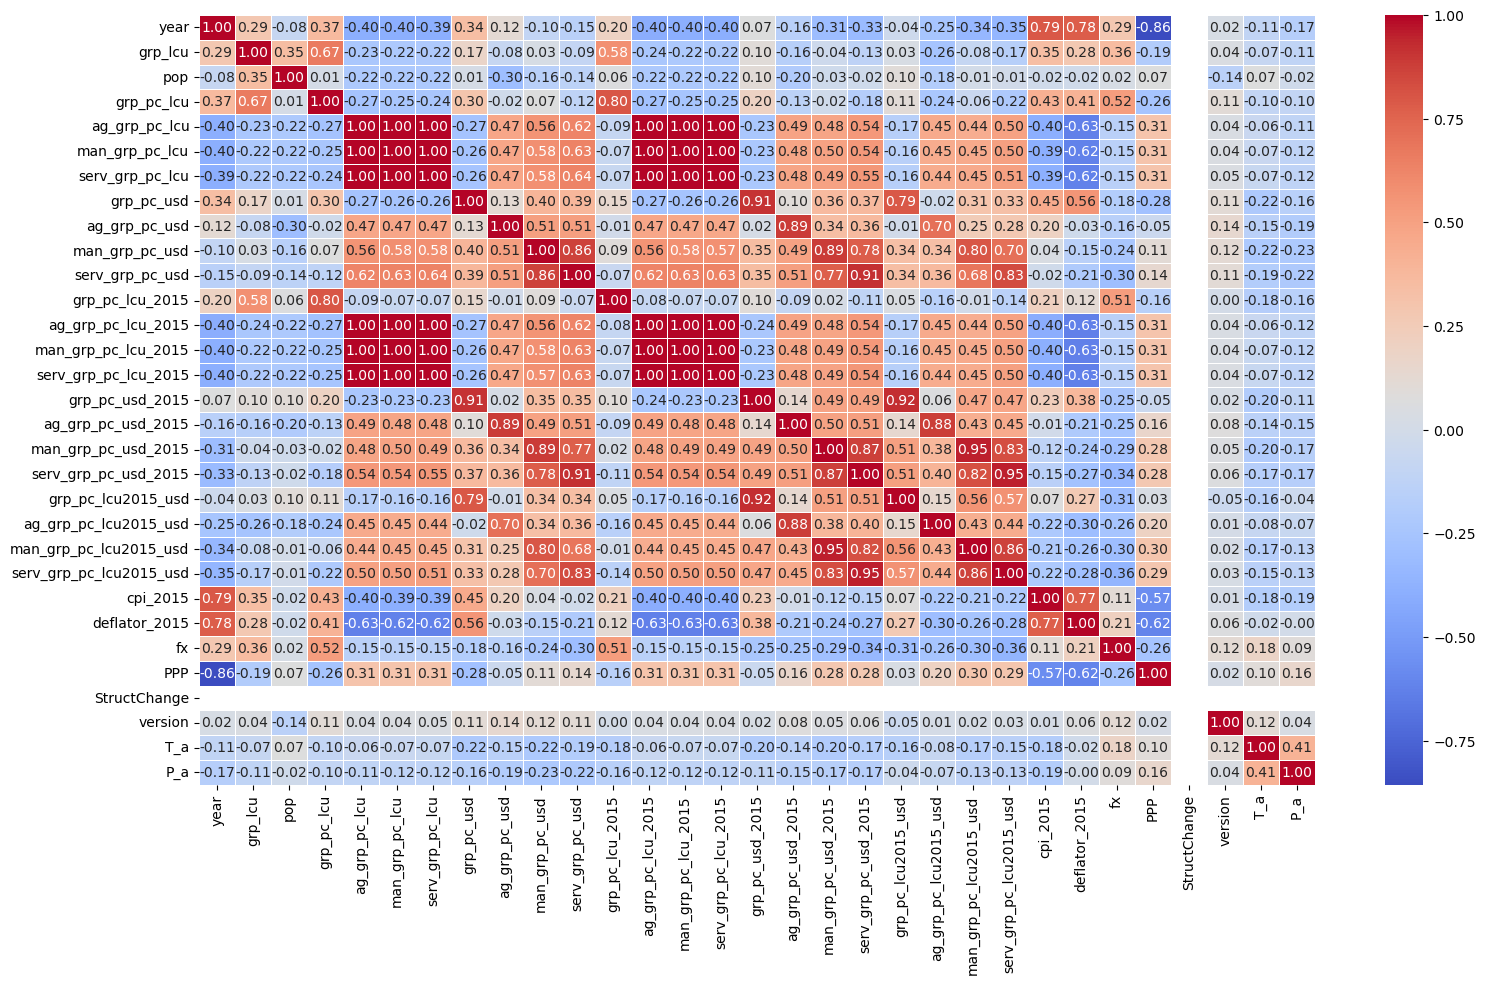

In [121]:
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


In [122]:
#GRP -> Gross Regional Product
#LCU -> Local Currency Unit


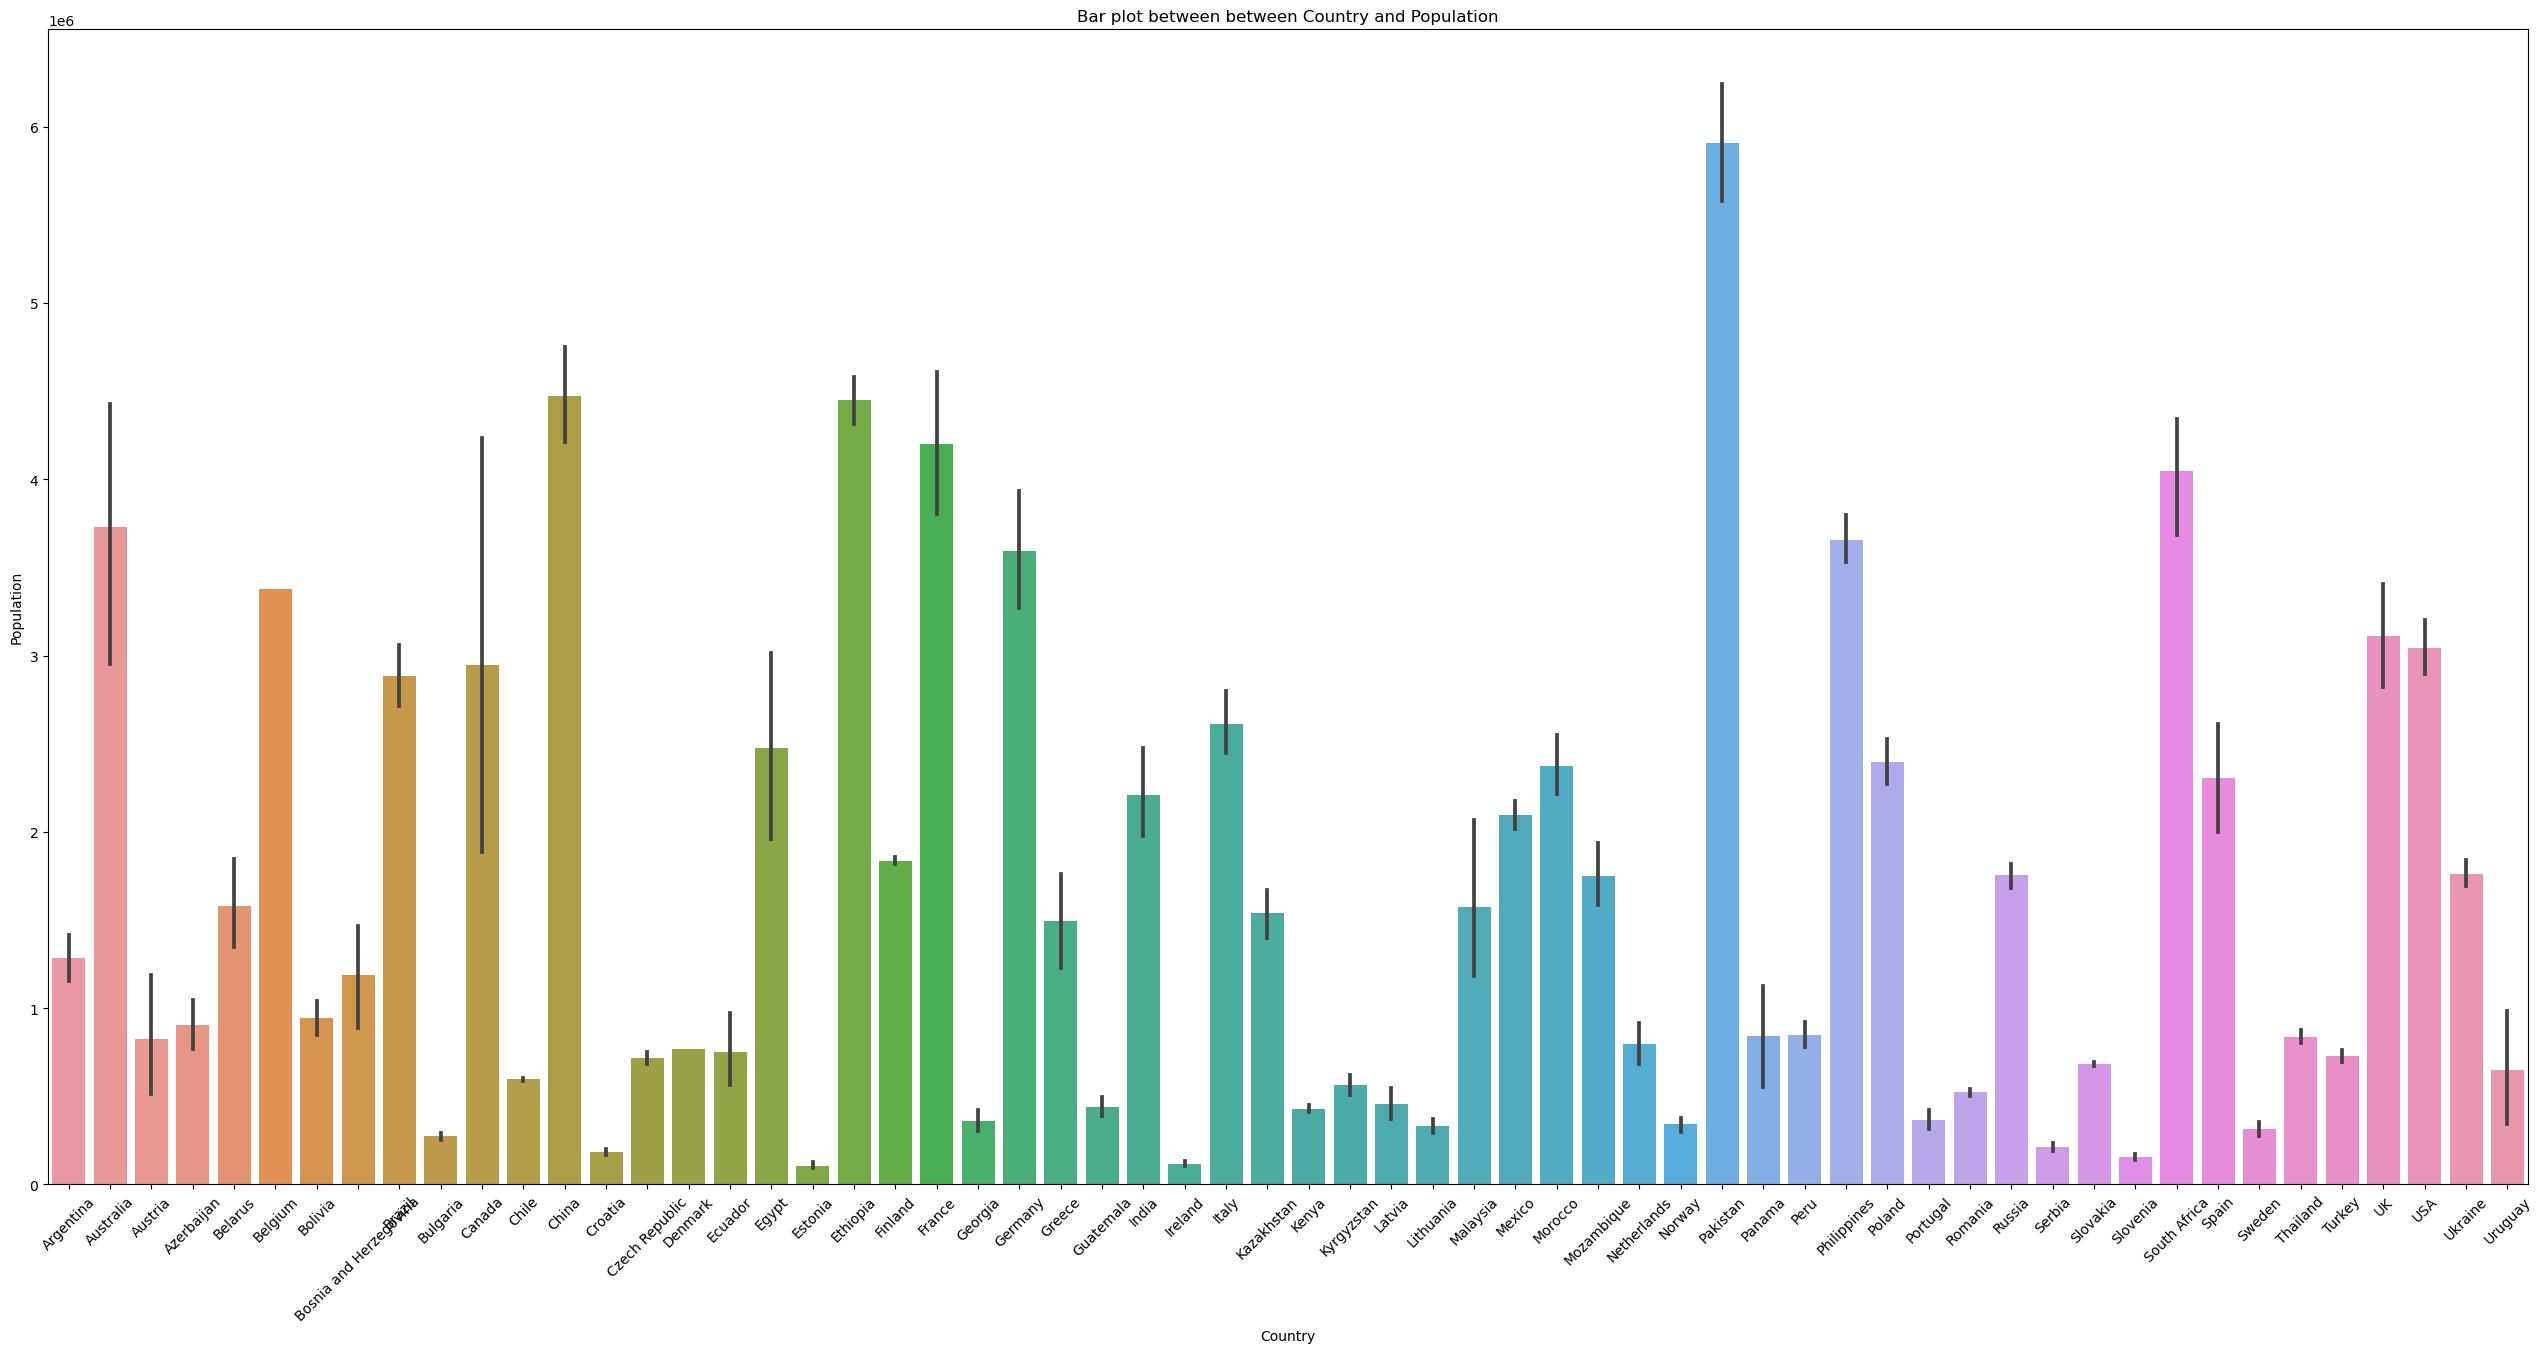

In [123]:
# Bar plot between between Country and Population
plt.figure(figsize=(32, 15))
sns.barplot(x='country', y='pop', data=df)
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Bar plot between between Country and Population')
plt.xticks(rotation=45)  
plt.show()

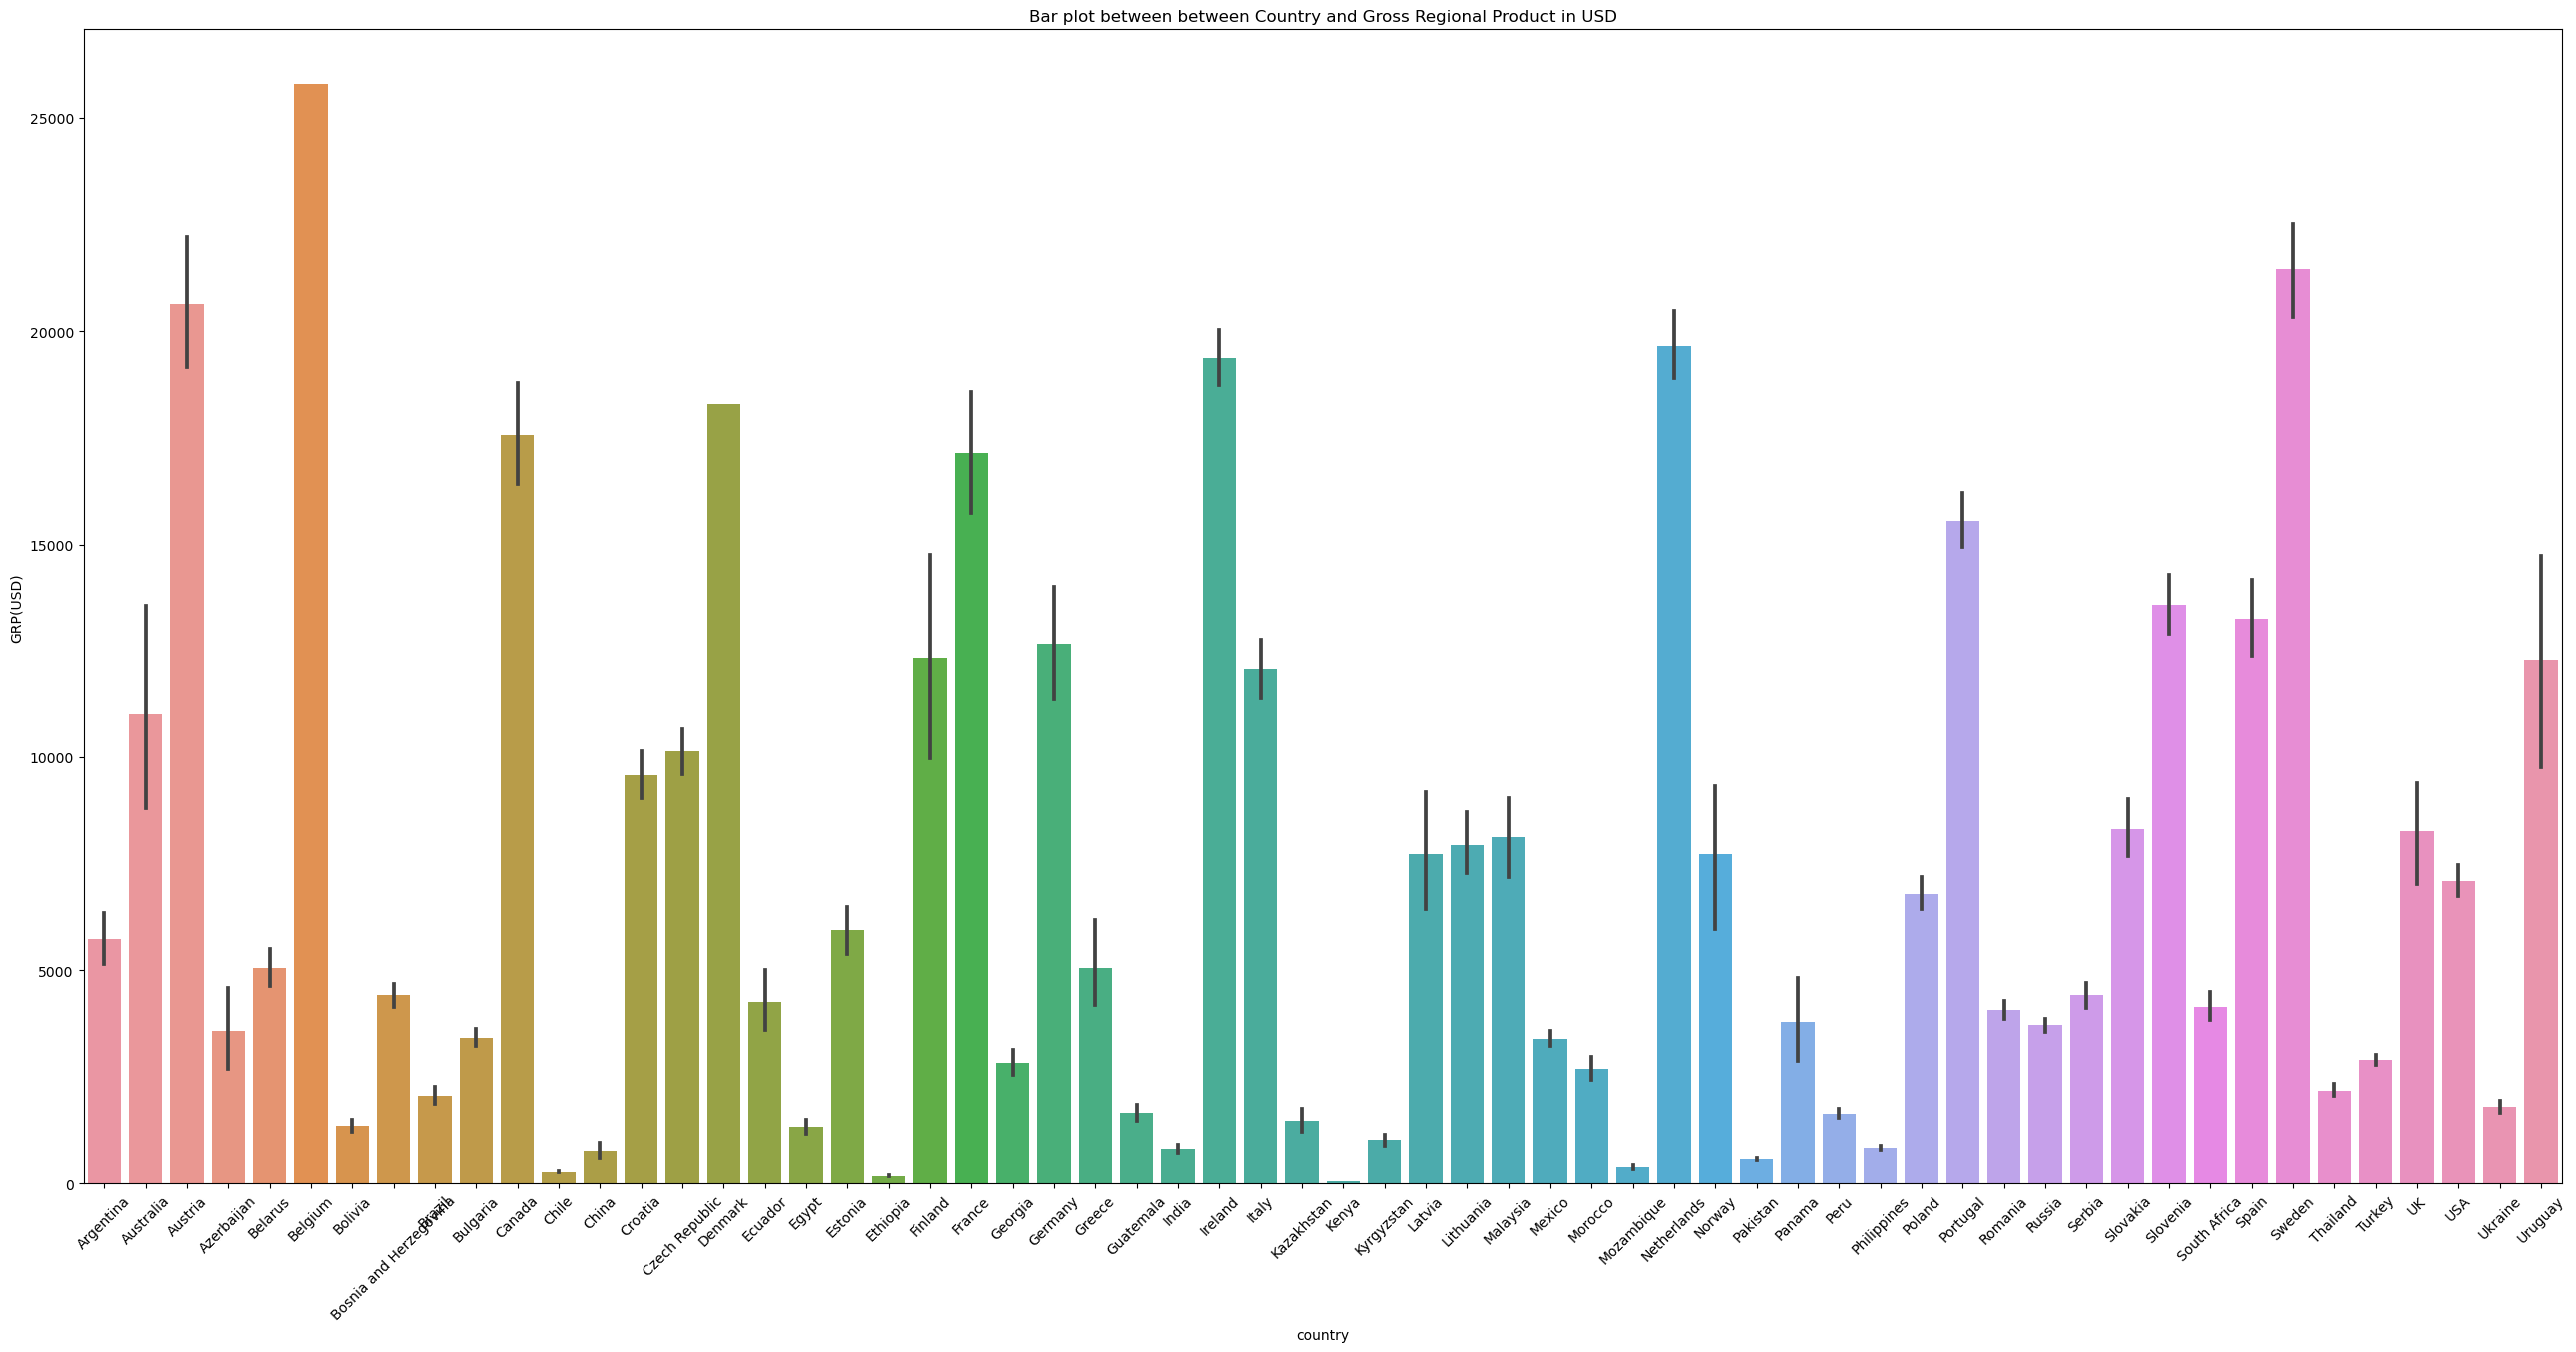

In [124]:
# Bar plot between between Country and Gross Regional Product in USD
plt.figure(figsize=(32, 15))
sns.barplot(x='country', y='grp_pc_usd', data=df)
plt.xlabel('country')
plt.ylabel('GRP(USD)')
plt.title('Bar plot between between Country and Gross Regional Product in USD')
plt.xticks(rotation=45)  
plt.show()

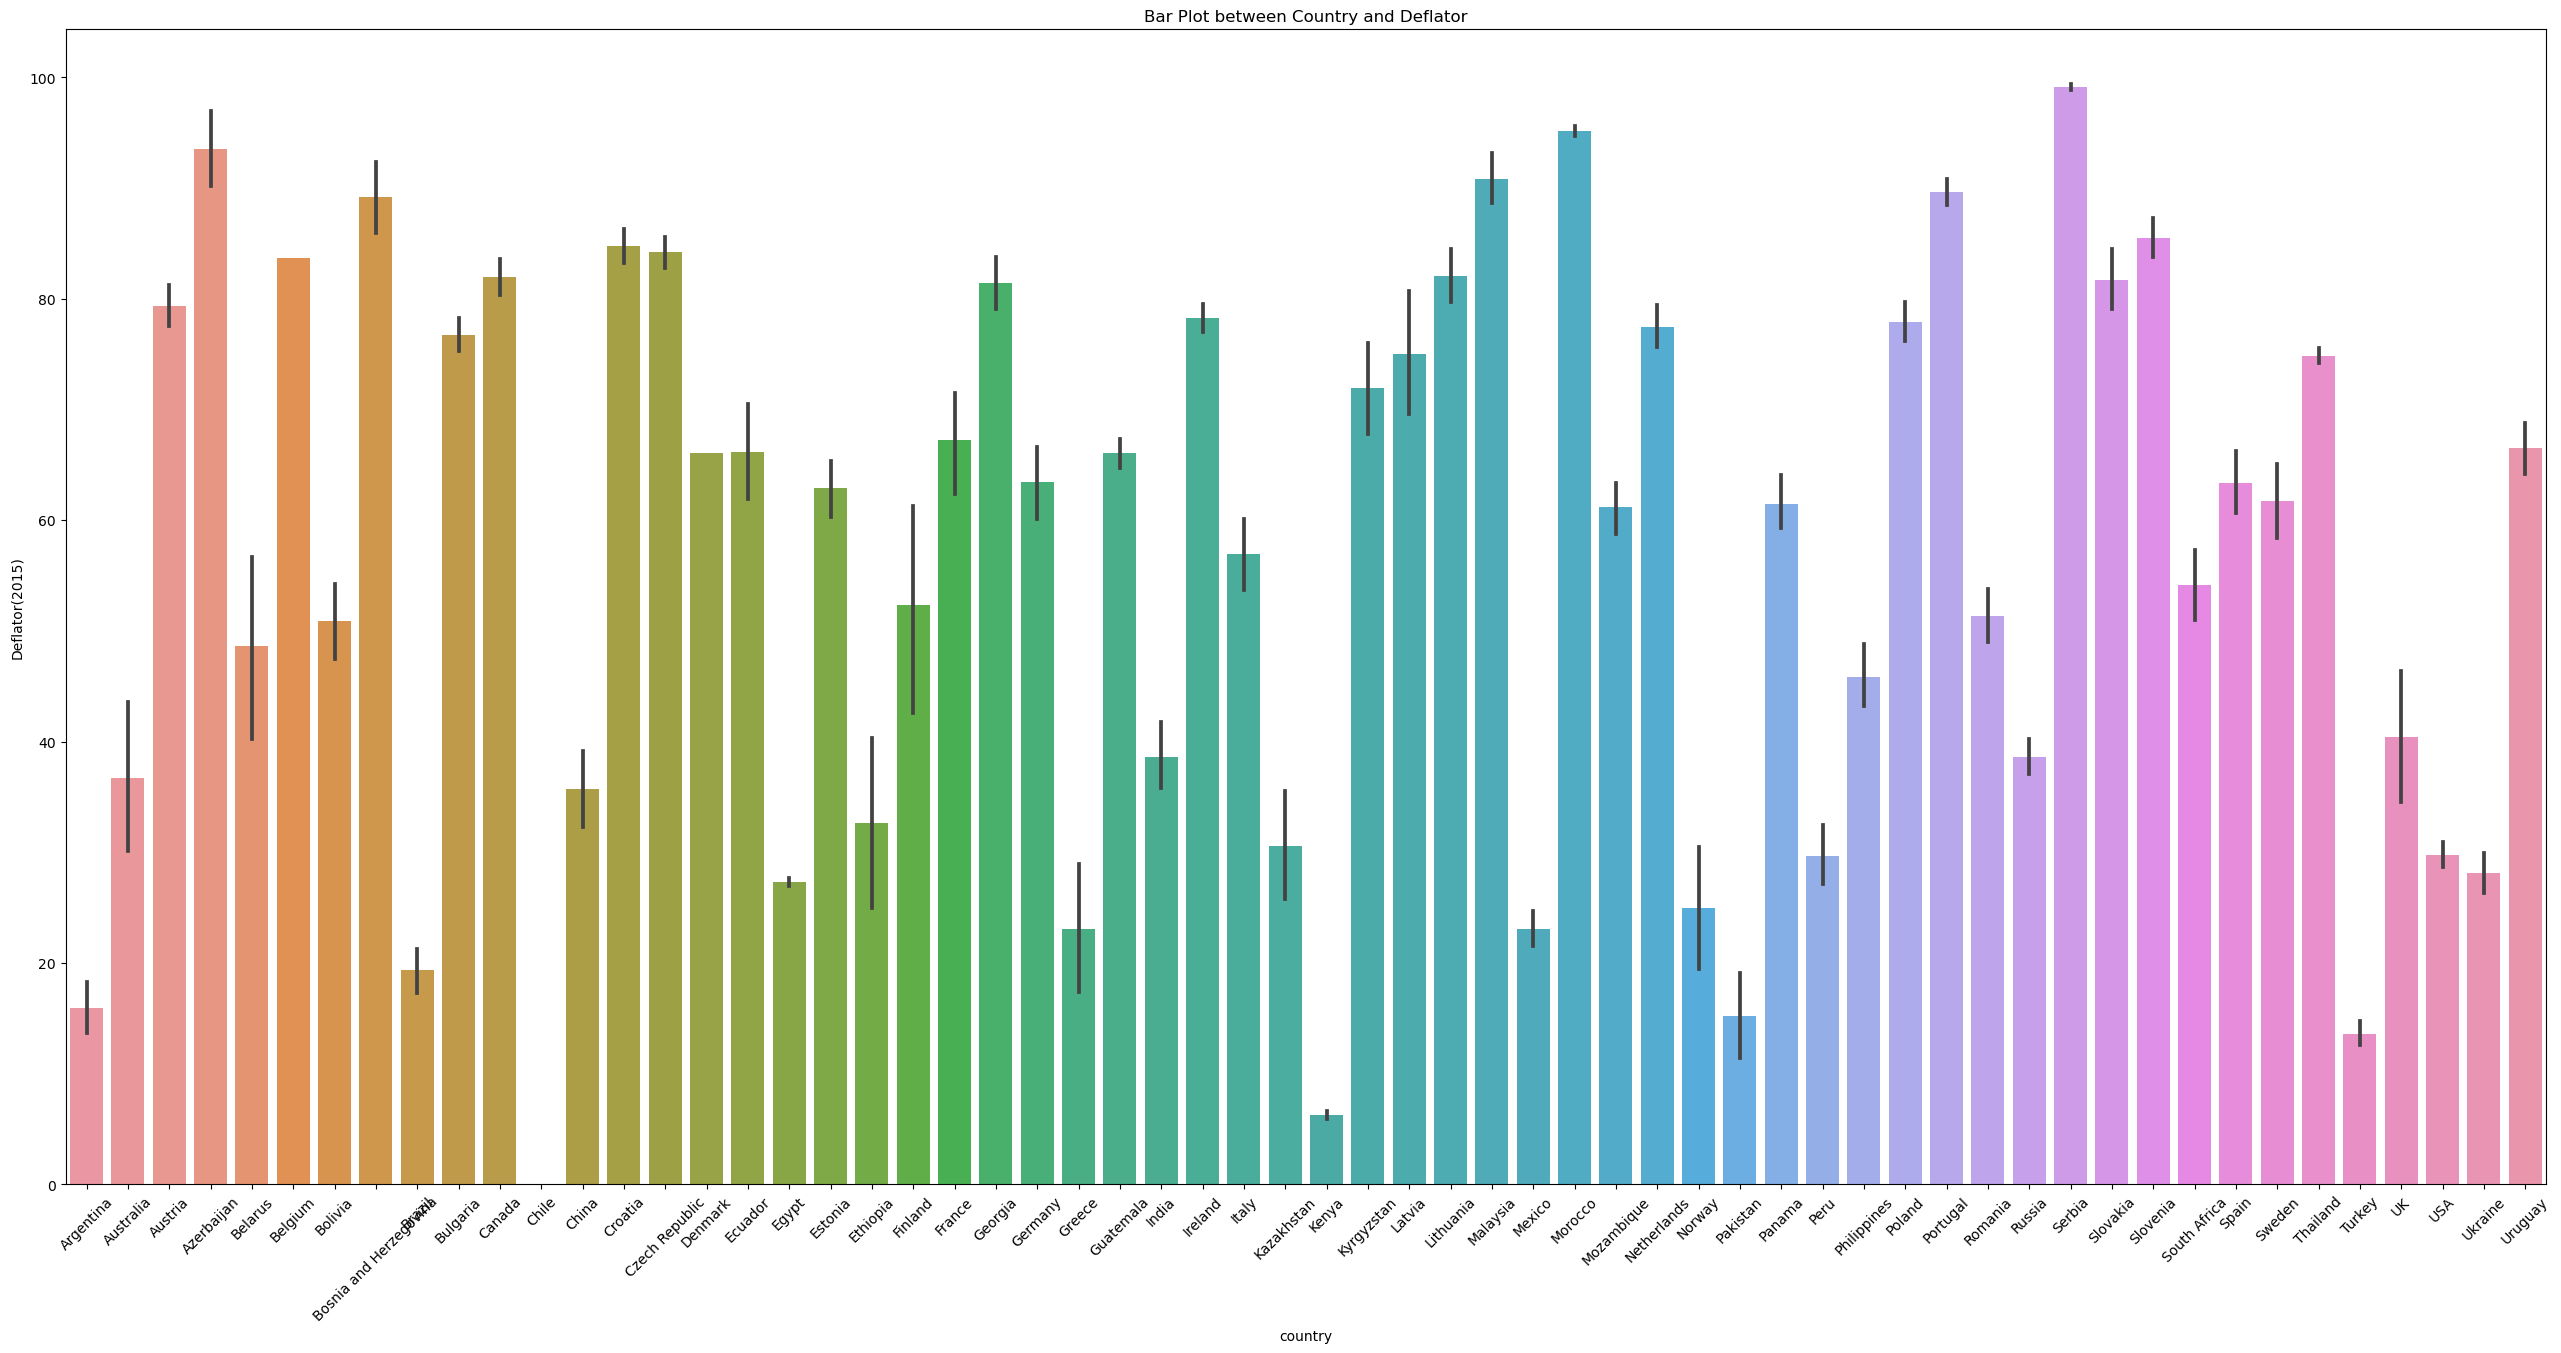

In [125]:
# Bar plot between between Country and Deflator
plt.figure(figsize=(32, 15))
sns.barplot(x='country', y='deflator_2015', data=df)
plt.xlabel('country')
plt.ylabel('Deflator(2015)')
plt.title('Bar Plot between Country and Deflator')
plt.xticks(rotation=45)  
plt.show()

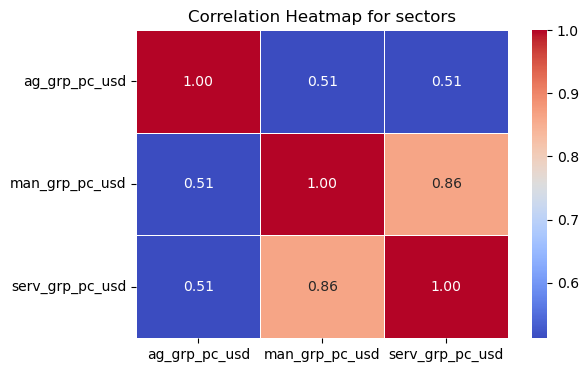

In [129]:
sectors = ['ag_grp_pc_usd','man_grp_pc_usd','serv_grp_pc_usd'] #Agriculture, Manufacture and Service sector.
correlation_matrix = df[sectors].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for sectors')
plt.show()

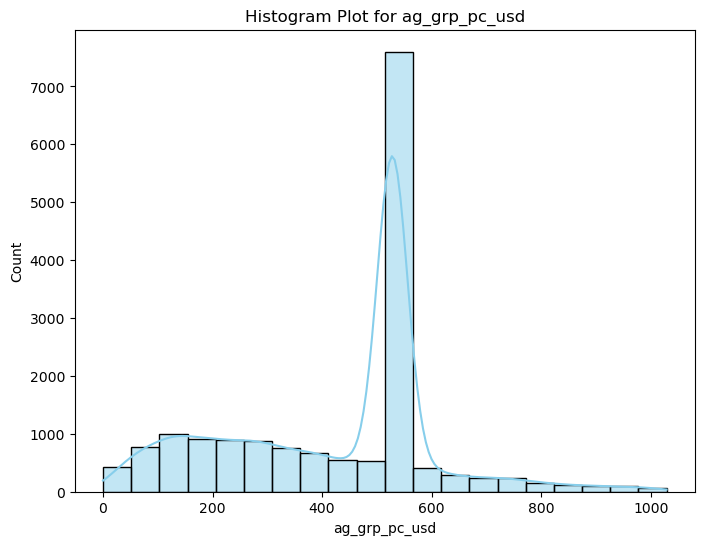

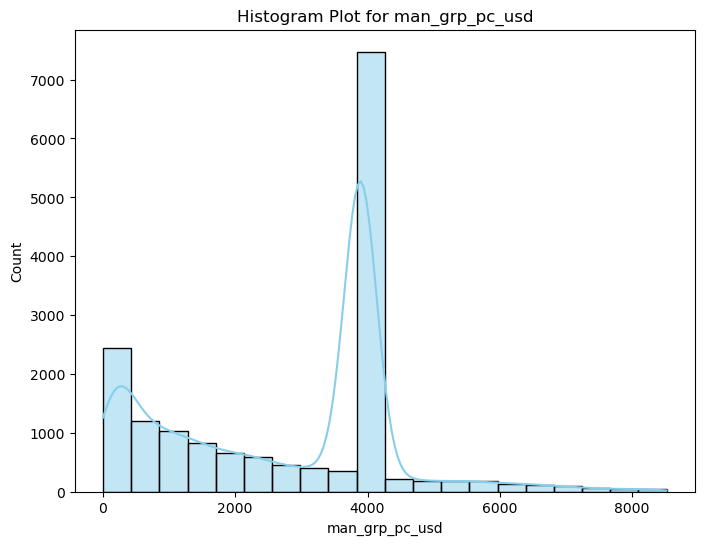

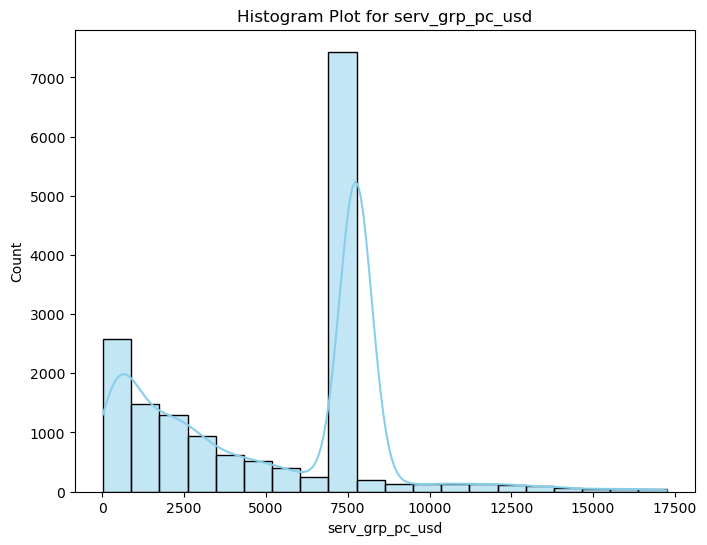

In [130]:
for sector in sectors:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[sector], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.xlabel(sector)
    plt.ylabel('Count')
    plt.title('Histogram Plot for ' + sector)
    plt.show()

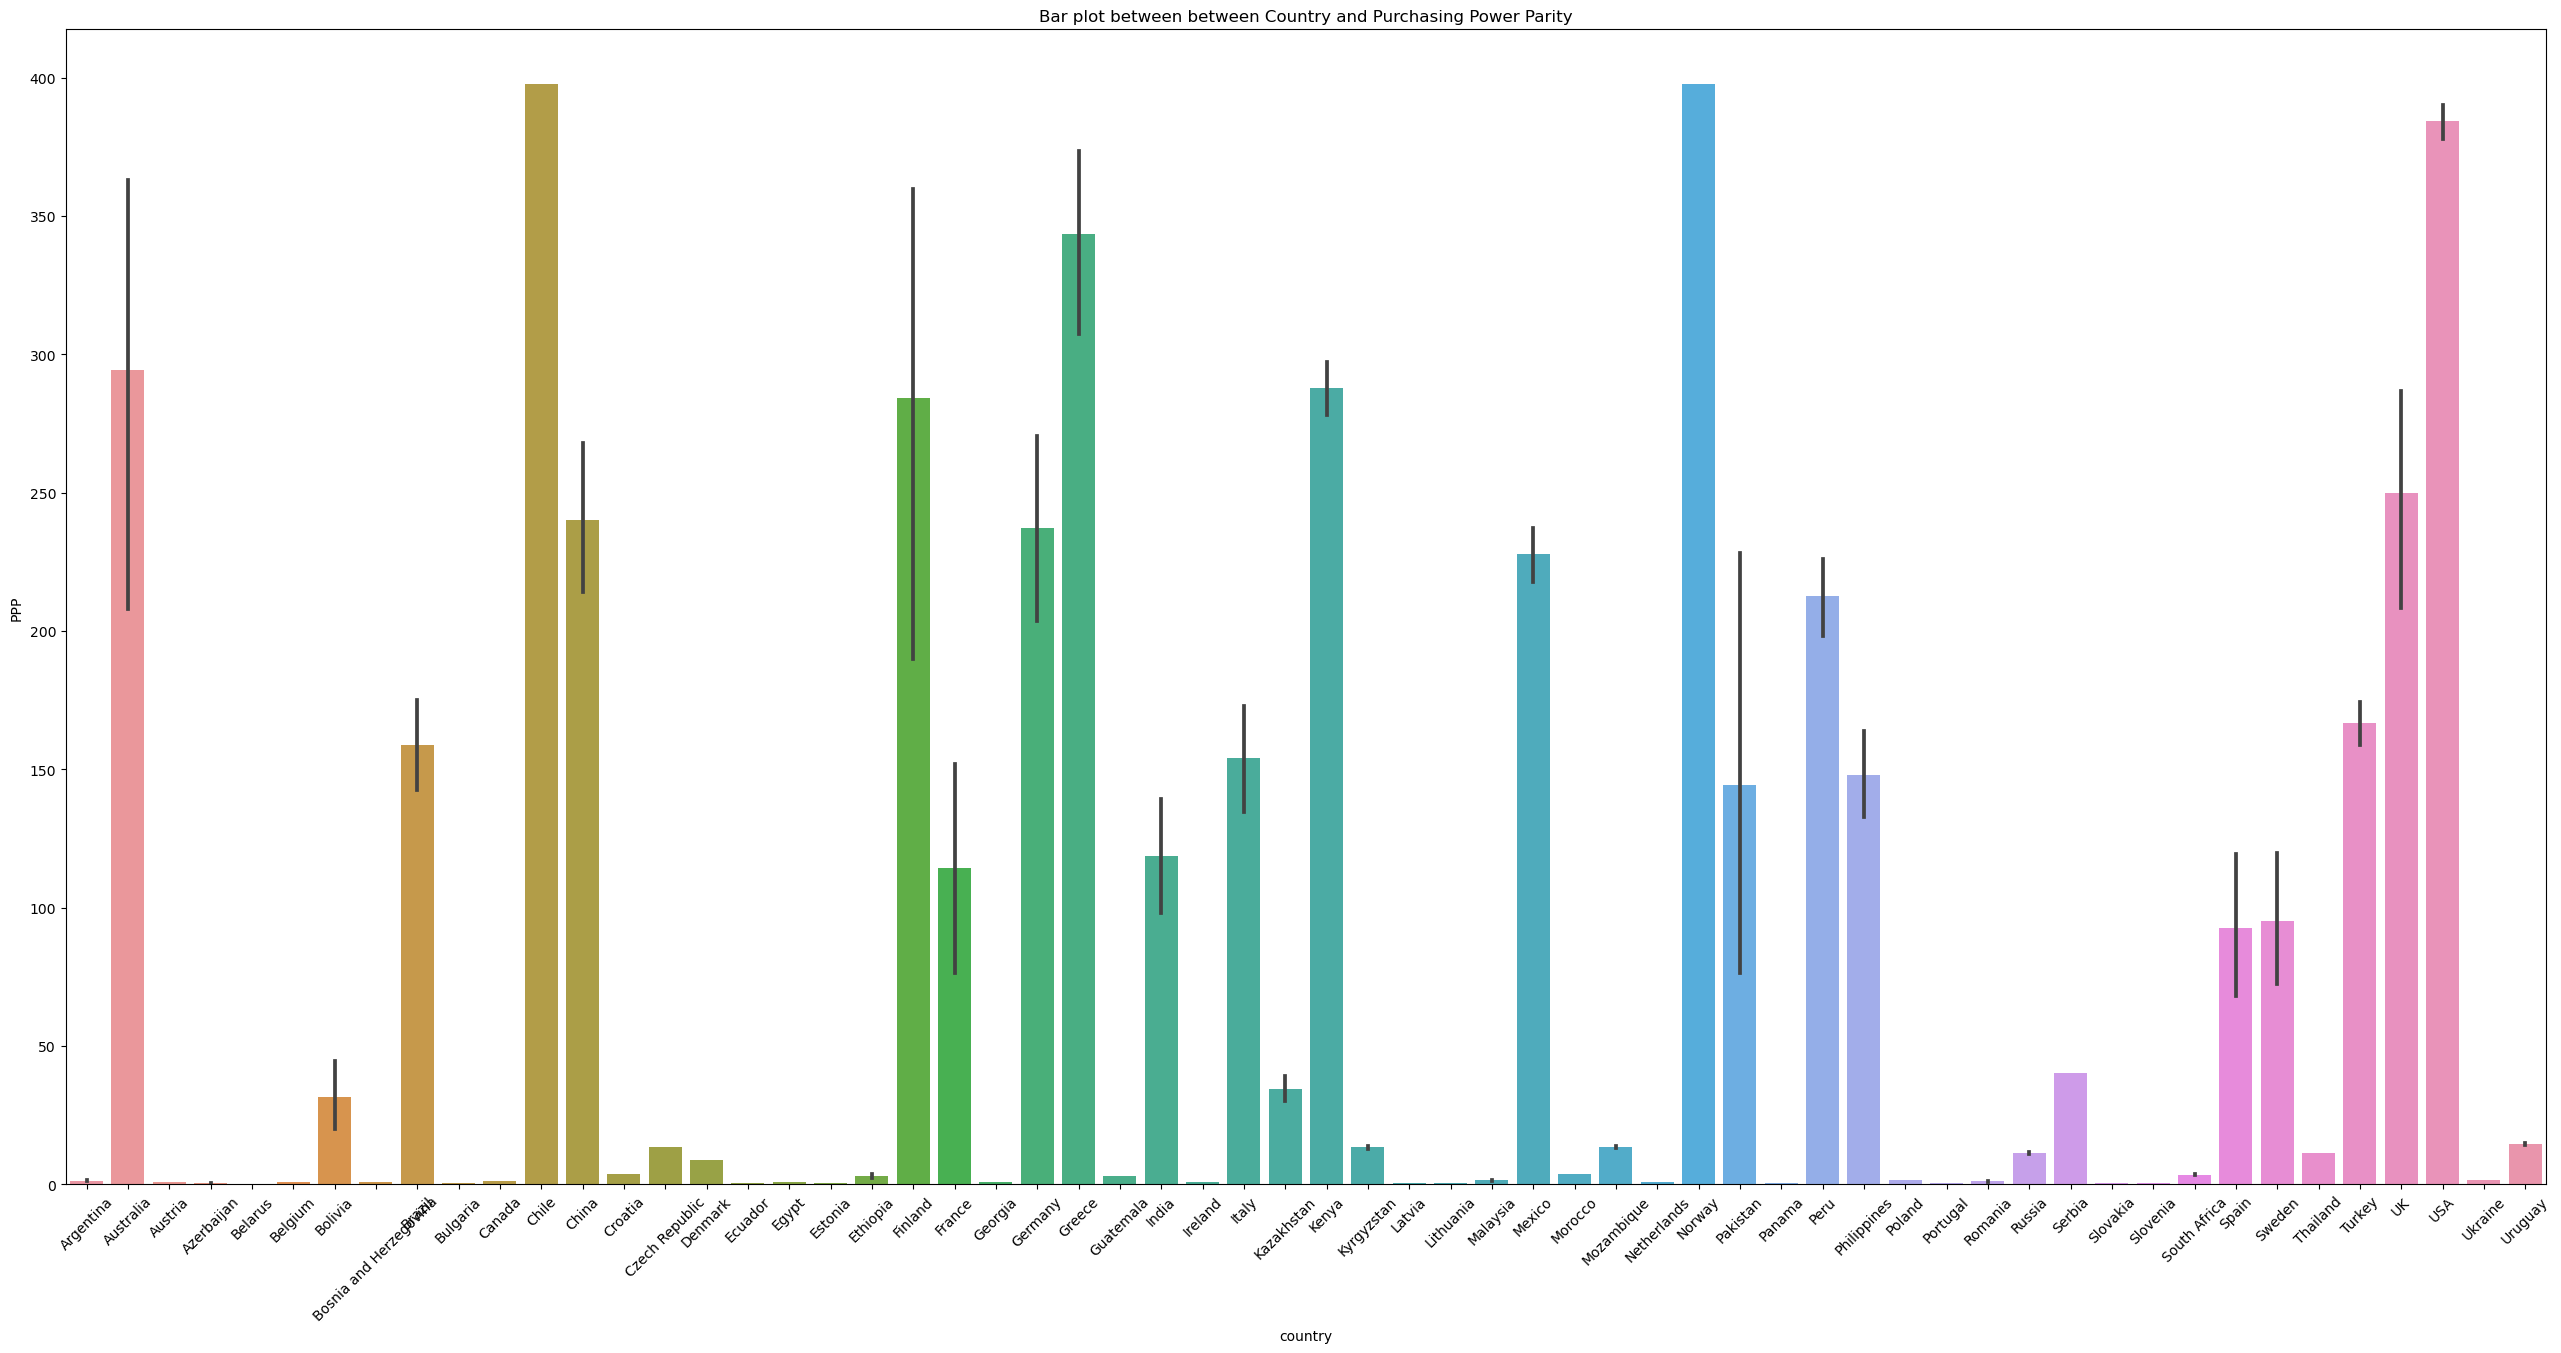

In [131]:
# Country wise PPP (Purchasing Power Parity) 
plt.figure(figsize=(32, 15))
sns.barplot(x='country', y='PPP', data=df)
plt.xlabel('country')
plt.ylabel('PPP')
plt.title('Bar plot between between Country and Purchasing Power Parity')
plt.xticks(rotation=45)  
plt.show()